In [85]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import neural_network
'''
import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm
from sklearn import gaussian_process
from sklearn import naive_bayes
from sklearn import neural_network
'''
import sklearn.metrics as met

In [74]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ids = test.pop("id")
train.columns.tolist()

['id',
 'bone_length',
 'rotting_flesh',
 'hair_length',
 'has_soul',
 'color',
 'type']

In [3]:
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
train.isnull().any()

id               False
bone_length      False
rotting_flesh    False
hair_length      False
has_soul         False
color            False
type             False
dtype: bool

In [75]:
#train = train.loc[train["type"] != "Ghost",]
train["subtype"] = train.apply(lambda x: x["type"] if x["type"] == 'Ghost' else x["color"] + "_" + x["type"], axis=1)
#train["subtype"] = train["color"] + "_" + train["type"]
#cols = ['bone_length','rotting_flesh','hair_length','has_soul']
cols = ['bone_length','rotting_flesh','hair_length','has_soul']
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,subtype
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,clear_Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin,green_Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul,black_Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul,black_Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost,Ghost


In [6]:
train[cols + ["type"]].groupby(['type']).describe()

bone_length  hair_length    has_soul  rotting_flesh
type                                                             
Ghost  count   117.000000   117.000000  117.000000     117.000000
       mean      0.347466     0.373186    0.320023       0.593759
       std       0.117748     0.117642    0.139790       0.142150
       min       0.061032     0.134600    0.009402       0.165539
       25%       0.269748     0.299507    0.230361       0.504399
       50%       0.340442     0.365142    0.307534       0.603780
       75%       0.417253     0.461068    0.415930       0.682687
       max       0.622371     0.636340    0.689980       0.932466
Ghoul  count   129.000000   129.000000  129.000000     129.000000
       mean      0.517159     0.655550    0.601634       0.490515
       std       0.120600     0.138127    0.134813       0.115357
       min       0.200753     0.287008    0.280854       0.172182
       25%       0.439625     0.556691    0.501544       0.417474
       50%       0.515397     0.667384    0.600393       0.491497
       75%       0.590384     0.751614    0.698480       0.561786
       max       0.817001     1.000000    0.935721       0.779153
Goblin count   125.000000   125.000000  125.000000     125.000000
       mean      0.429650     0.544581    0.478663       0.442357
       std       0.101917     0.116964    0.127293       0.140284
       min       0.208625     0.239212    0.194413       0.095687
       25%       0.355313     0.474255    0.377121       0.341187
       50%       0.430797     0.558776    0.466024       0.457490
       75%       0.492438     0.621787    0.557136       0.530852
       max       0.678519     0.840013    0.854949       0.840049

In [7]:
color_perc = train.pivot_table(values=['id'], columns=["color"], index=["type"], fill_value=0, aggfunc=len).apply(lambda x : 100*x / x.sum(), axis=1)
color_perc

id                                                     
color       black     blood      blue      clear      green      white
type                                                                  
Ghost   11.965812  5.128205  5.128205  27.350427  12.820513  37.606838
Ghoul   10.852713  3.100775  4.651163  32.558140  10.077519  38.759690
Goblin  10.400000  1.600000  5.600000  36.800000  11.200000  34.400000

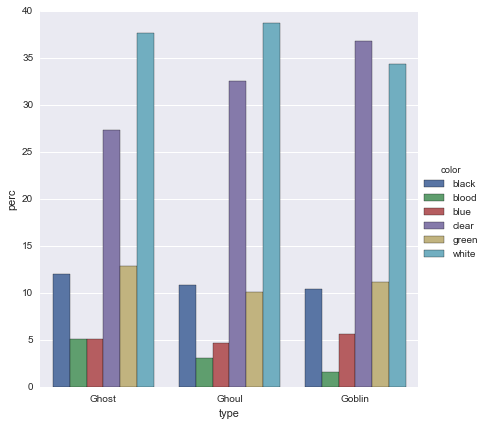

In [8]:
a = color_perc.unstack().reset_index().drop('level_0',1)
a = a.rename(columns = {list(a)[2]: 'perc'})
g = sns.factorplot(x="type", y="perc",  hue="color", data=a, kind="bar", size=6)

C:\Users\wizur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


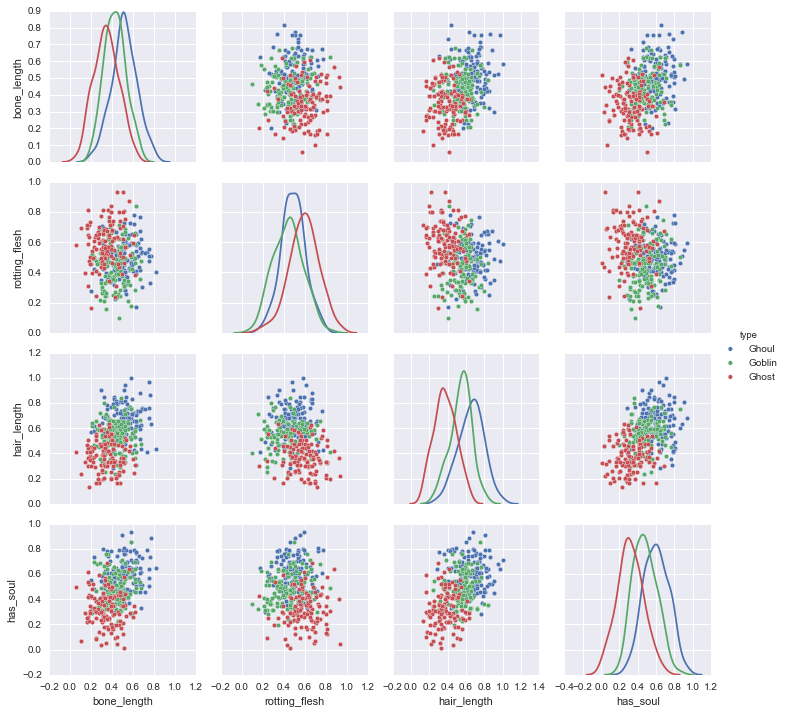

In [9]:
sns.pairplot(train, vars=cols, hue='type',kind='scatter',diag_kind='kde') 

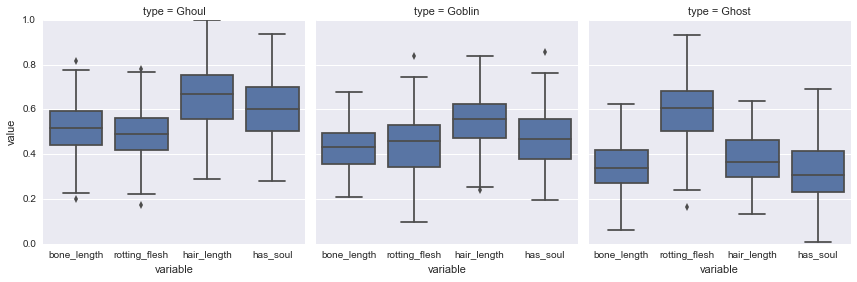

In [9]:
melt = pd.melt(train[cols + ['type']], id_vars='type')
g = sns.FacetGrid(melt, col='type', size=4, aspect=1)
g.map(sns.boxplot, 'variable', 'value')

C:\Users\wizur\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


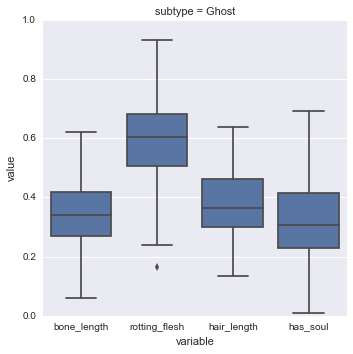

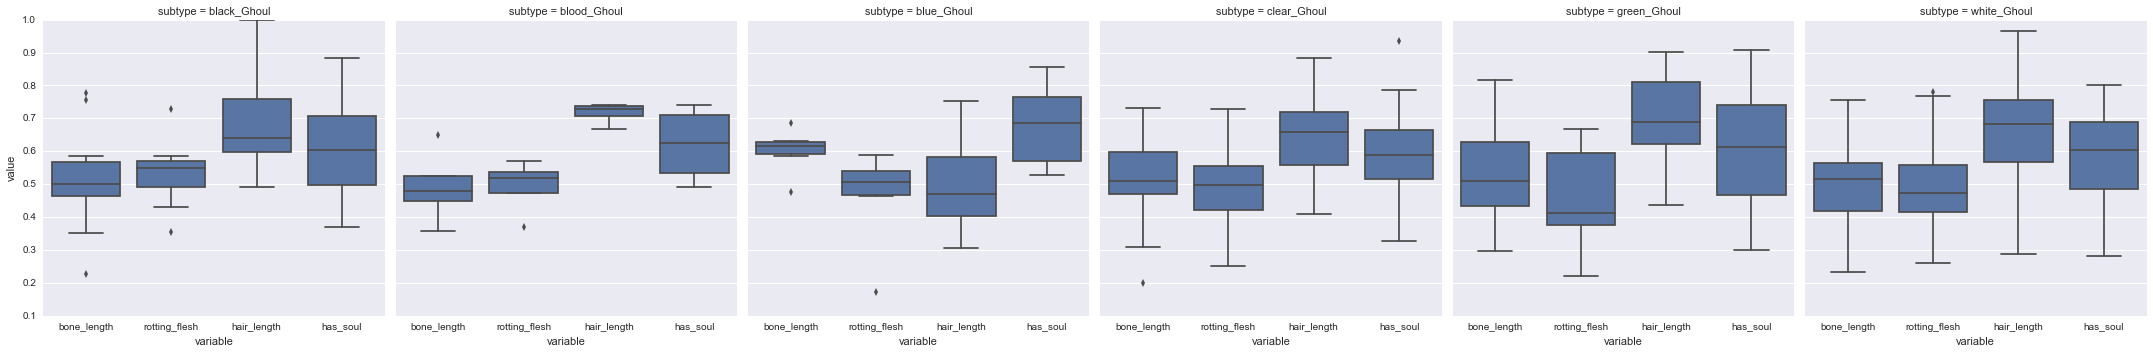

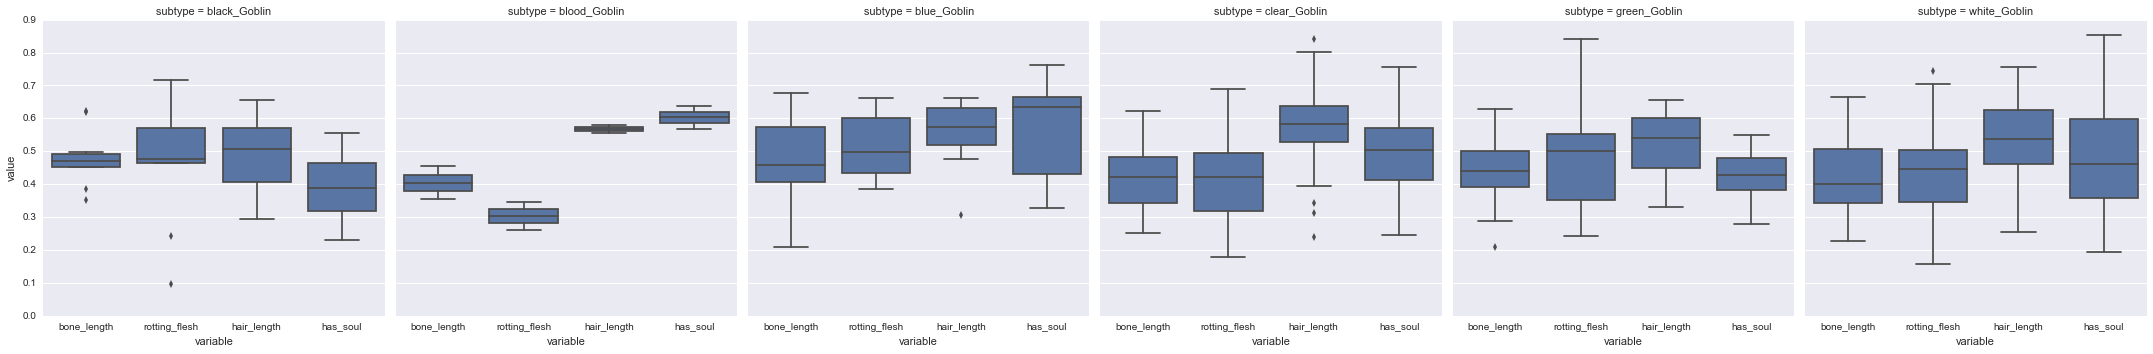

In [10]:
melt = pd.melt(train[cols + ['type', 'subtype', 'color']], id_vars=['subtype', 'type', 'color'])
melt = melt.sort(['type', 'color'])
types = melt['type'].unique()
plt.figure(figsize=(300,100))
for x in types:
    g = sns.FacetGrid(melt[melt["type"] == x], col='subtype', size=5, aspect=1)
    g = g.map(sns.boxplot, 'variable', 'value')
    g
    g.savefig(x + "_output.png")

In [11]:
train.sort(['type', 'color']).groupby(["subtype"])["id"].count()

C:\Users\wizur\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


subtype
Ghost           117
black_Ghoul      14
black_Goblin     13
blood_Ghoul       4
blood_Goblin      2
blue_Ghoul        6
blue_Goblin       7
clear_Ghoul      42
clear_Goblin     46
green_Ghoul      13
green_Goblin     14
white_Ghoul      50
white_Goblin     43
Name: id, dtype: int64

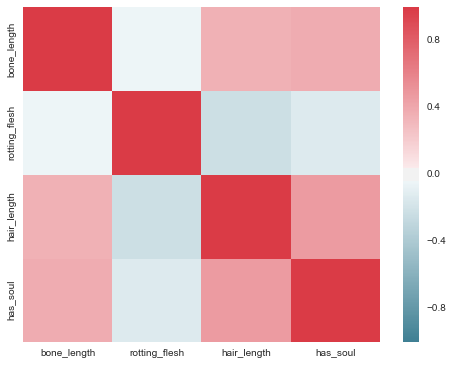

In [12]:
# correlation matrix for margin features
corr = train[cols].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap)

In [76]:
train['hair_soul'] = train['hair_length'] * train['has_soul']
train['hair_bone'] = train['hair_length'] * train['bone_length']
test['hair_soul'] = test['hair_length'] * test['has_soul']
test['hair_bone'] = test['hair_length'] * test['bone_length']
train['hair_soul_bone'] = train['hair_length'] * train['has_soul'] * train['bone_length']
test['hair_soul_bone'] = test['hair_length'] * test['has_soul'] * test['bone_length']

In [13]:
df_train = pd.get_dummies(train)
df_test = pd.get_dummies(test)
df_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,...,subtype_blood_Ghoul,subtype_blood_Goblin,subtype_blue_Ghoul,subtype_blue_Goblin,subtype_clear_Ghoul,subtype_clear_Goblin,subtype_green_Ghoul,subtype_green_Goblin,subtype_white_Ghoul,subtype_white_Goblin
0,0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [77]:
predictor = ["type", "subtype"]
X_train = {}
X_test = {}
y_train = {}
y_test = {}
y = {}
for pred in predictor:
    y[pred] = train[pred]
    df_train = train.drop(["type", "color", "id", "subtype"],1)
    df_test =  test.drop(["color"],1)
    X_train[pred], X_test[pred], y_train[pred], y_test[pred] = train_test_split(df_train, y[pred], test_size=0.3, random_state=0)



In [6]:
y_train["type"].head()

103    Goblin
223     Ghoul
325     Ghoul
287     Ghoul
132     Ghoul
Name: type, dtype: object

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('double'),2) / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("confusematrix.png")


In [7]:
def convert_sub_to_type(mylist):
    y_actual = []
    for s in mylist:
        val = ""
        if "Ghost" in s:
            val = "Ghost"
        elif "Ghoul" in s:
            val = "Ghoul"
        elif "Goblin" in s:
            val = "Goblin"
        y_actual.append(val)
    return y_actual

-----------------------type-------------------------------
*********************************************
Values for svc
Accuracy 0.7857142857142857
classification report 
             precision    recall  f1-score   support

      Ghost       0.92      0.80      0.86        41
      Ghoul       0.76      0.91      0.83        35
     Goblin       0.68      0.64      0.66        36

avg / total       0.79      0.79      0.78       112

Normalized confusion matrix
[[ 0.8   0.    0.2 ]
 [ 0.    0.91  0.09]
 [ 0.08  0.28  0.64]]


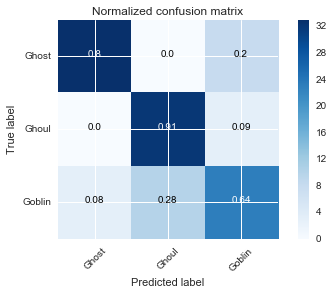

*********************************************
Values for nn
Accuracy 0.7946428571428571
classification report 
             precision    recall  f1-score   support

      Ghost       0.94      0.83      0.88        41
      Ghoul       0.77      0.86      0.81        35
     Goblin       0.68      0.69      0.68        36

avg / total       0.80      0.79      0.80       112

Normalized confusion matrix
[[ 0.83  0.    0.17]
 [ 0.    0.86  0.14]
 [ 0.06  0.25  0.69]]


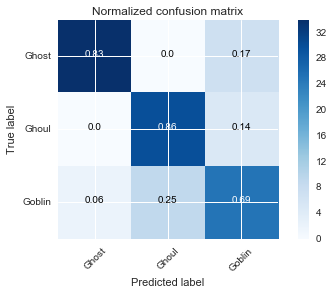

*********************************************
Values for knn
Accuracy 0.75
classification report 
             precision    recall  f1-score   support

      Ghost       0.88      0.90      0.89        41
      Ghoul       0.67      0.91      0.77        35
     Goblin       0.68      0.42      0.52        36

avg / total       0.75      0.75      0.73       112

Normalized confusion matrix
[[ 0.9   0.    0.1 ]
 [ 0.    0.91  0.09]
 [ 0.14  0.44  0.42]]


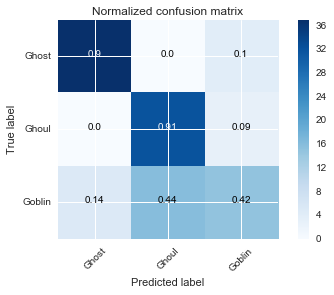

*********************************************
Values for lr
Accuracy 0.7857142857142857
classification report 
             precision    recall  f1-score   support

      Ghost       0.90      0.85      0.88        41
      Ghoul       0.76      0.89      0.82        35
     Goblin       0.69      0.61      0.65        36

avg / total       0.79      0.79      0.78       112

Normalized confusion matrix
[[ 0.85  0.    0.15]
 [ 0.    0.89  0.11]
 [ 0.11  0.28  0.61]]


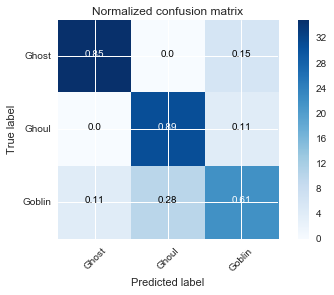

*********************************************
Values for rf
Accuracy 0.6875
classification report 
             precision    recall  f1-score   support

      Ghost       0.84      0.78      0.81        41
      Ghoul       0.64      0.83      0.73        35
     Goblin       0.55      0.44      0.49        36

avg / total       0.69      0.69      0.68       112

Normalized confusion matrix
[[ 0.78  0.05  0.17]
 [ 0.    0.83  0.17]
 [ 0.17  0.39  0.44]]


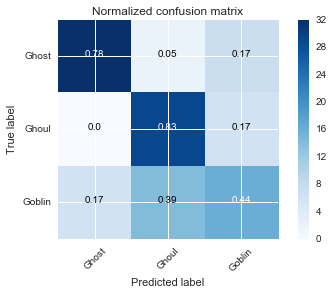

*********************************************
Values for bayes
Accuracy 0.7589285714285714
classification report 
             precision    recall  f1-score   support

      Ghost       0.82      0.88      0.85        41
      Ghoul       0.79      0.77      0.78        35
     Goblin       0.65      0.61      0.63        36

avg / total       0.76      0.76      0.76       112

Normalized confusion matrix
[[ 0.88  0.    0.12]
 [ 0.03  0.77  0.2 ]
 [ 0.19  0.19  0.61]]


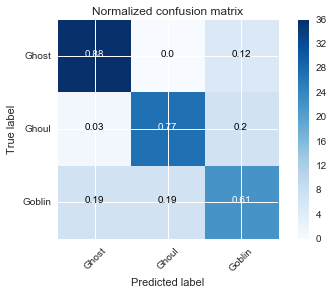

-----------------------subtype-------------------------------
*********************************************
Values for svc
Accuracy 0.6428571428571429
classification report 
             precision    recall  f1-score   support

      Ghost       0.63      1.00      0.77        41
      Ghoul       0.66      0.89      0.76        35
     Goblin       0.00      0.00      0.00        36

avg / total       0.44      0.64      0.52       112

Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.11  0.89  0.  ]
 [ 0.56  0.44  0.  ]]


C:\Users\wizur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


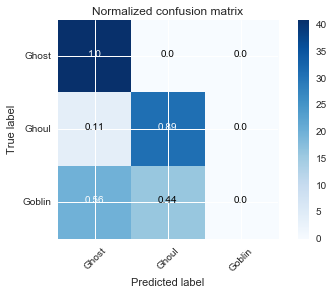

*********************************************
Values for nn
Accuracy 0.7946428571428571
classification report 
             precision    recall  f1-score   support

      Ghost       0.88      0.90      0.89        41
      Ghoul       0.74      0.91      0.82        35
     Goblin       0.74      0.56      0.63        36

avg / total       0.79      0.79      0.79       112

Normalized confusion matrix
[[ 0.9   0.    0.1 ]
 [ 0.    0.91  0.09]
 [ 0.14  0.31  0.56]]


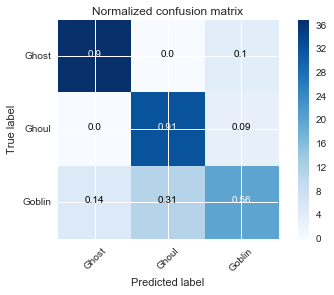

*********************************************
Values for knn
Accuracy 0.7767857142857143
classification report 
             precision    recall  f1-score   support

      Ghost       0.81      0.93      0.86        41
      Ghoul       0.75      0.86      0.80        35
     Goblin       0.76      0.53      0.62        36

avg / total       0.77      0.78      0.77       112

Normalized confusion matrix
[[ 0.93  0.    0.07]
 [ 0.06  0.86  0.09]
 [ 0.19  0.28  0.53]]


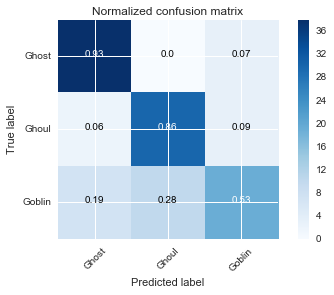

*********************************************
Values for lr
Accuracy 0.7767857142857143
classification report 
             precision    recall  f1-score   support

      Ghost       0.92      0.85      0.89        41
      Ghoul       0.76      0.80      0.78        35
     Goblin       0.65      0.67      0.66        36

avg / total       0.78      0.78      0.78       112

Normalized confusion matrix
[[ 0.85  0.    0.15]
 [ 0.    0.8   0.2 ]
 [ 0.08  0.25  0.67]]


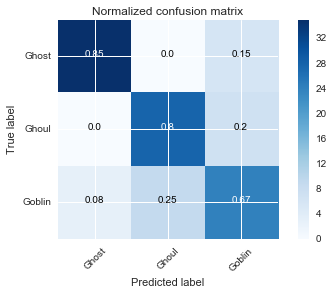

*********************************************
Values for rf
Accuracy 0.7321428571428571
classification report 
             precision    recall  f1-score   support

      Ghost       0.93      0.90      0.91        41
      Ghoul       0.62      0.83      0.71        35
     Goblin       0.64      0.44      0.52        36

avg / total       0.74      0.73      0.72       112

Normalized confusion matrix
[[ 0.9   0.02  0.07]
 [ 0.    0.83  0.17]
 [ 0.08  0.47  0.44]]


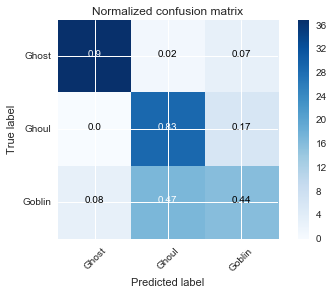

*********************************************
Values for bayes
Accuracy 0.7767857142857143
classification report 
             precision    recall  f1-score   support

      Ghost       0.82      0.90      0.86        41
      Ghoul       0.82      0.77      0.79        35
     Goblin       0.68      0.64      0.66        36

avg / total       0.77      0.78      0.77       112

Normalized confusion matrix
[[ 0.9   0.    0.1 ]
 [ 0.03  0.77  0.2 ]
 [ 0.19  0.17  0.64]]


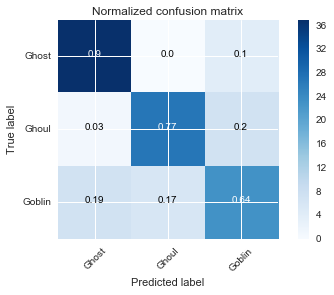

In [95]:
tests = {}
preds = {
    "type": pd.DataFrame(),
    "subtype": pd.DataFrame()
}
tests['lr'] = LogisticRegression(penalty='l2',C=1000000,class_weight="balanced")
tests['rf'] = RandomForestClassifier(n_estimators=10, n_jobs=-1)
tests['knn'] = KNeighborsClassifier(n_neighbors=4)
tests['svc'] = svm.SVC() #svm.NuSVC()
tests['bayes'] = GaussianNB()
tests['nn'] = neural_network.MLPClassifier(alpha=0.1, hidden_layer_sizes=(6), max_iter=500, random_state=3, solver='lbfgs')

for pred in predictor:
    print("-----------------------{}-------------------------------".format(pred))
    y_actual = y_test[pred]
    y_actual = convert_sub_to_type(y_test[pred])
    np.set_printoptions(precision=2)
    #class_names = np.sort(y.unique())
    class_names = sorted(set(y_actual))
    for key in tests:
        tests[key].fit(X_train[pred],y_train[pred])
        y_pred= tests[key].predict(X_test[pred])
        y_pred= convert_sub_to_type(y_pred)
        print("*********************************************")
        print("Values for {}".format(key))
        print("Accuracy {}".format(met.accuracy_score(y_actual, y_pred)))
        preds[pred][key] = y_pred
        print("classification report \n{}".format(met.classification_report(y_actual, y_pred)))
        cnf_matrix = met.confusion_matrix(y_actual,y_pred)
        #pd.crosstab(y_actual, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True).to_csv(key+".csv")
        #print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))    
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                              title='Normalized confusion matrix')
        plt.show()


In [63]:
tests_fnl = {}
preds_fnl = pd.DataFrame()

tests_fnl['lr'] = LogisticRegression(penalty='l2',C=1000000,class_weight="balanced")
tests_fnl['rf'] = RandomForestClassifier(n_estimators=750, n_jobs=-1)
tests_fnl['knn'] = KNeighborsClassifier(n_neighbors=4)
tests_fnl['svc'] = svm.SVC()
tests_fnl['bayes'] = GaussianNB()


df_train = train.drop(["type", "subtype", "color", "id"],1)
df_test =  test.drop(["color"],1)

for key in tests_fnl:
    tests_fnl[key].fit(df_train,y["subtype"])
    y_pred = tests_fnl[key].predict(df_test)
    y_pred= convert_sub_to_type(y_pred)
    preds_fnl[key] = y_pred
preds_fnl.head()

,svc,bayes,rf,knn,lr
0,Ghoul,Ghoul,Ghoul,Goblin,Ghoul
1,Ghost,Goblin,Goblin,Goblin,Goblin
2,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul
3,Ghost,Goblin,Ghoul,Ghost,Goblin
4,Ghost,Ghost,Ghost,Ghost,Ghost


In [64]:
preds_fnl = pd.concat([preds_fnl, preds_fnl.apply(pd.Series.value_counts, axis=1)], axis=1)
preds_fnl = preds_fnl.fillna(0)
preds_fnl["Ghost"] = preds_fnl.apply(lambda x: x["Ghost"] + (0.5 if x["bayes"] == "Ghost" else 0), axis=1)
preds_fnl["Ghost"] = preds_fnl.apply(lambda x: x["Ghost"] + (0.5 if x["lr"] == "Ghost" else 0), axis=1)

preds_fnl["id"] = ids
preds_fnl.head(10)

,svc,bayes,rf,knn,lr,Ghost,Ghoul,Goblin,id
0,Ghoul,Ghoul,Ghoul,Goblin,Ghoul,0.0,4.0,1.0,3
1,Ghost,Goblin,Goblin,Goblin,Goblin,1.0,0.0,4.0,6
2,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,0.0,5.0,0.0,9
3,Ghost,Goblin,Ghoul,Ghost,Goblin,2.0,1.0,2.0,10
4,Ghost,Ghost,Ghost,Ghost,Ghost,6.0,0.0,0.0,13
5,Ghost,Ghost,Ghost,Ghost,Ghost,6.0,0.0,0.0,14
6,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,0.0,5.0,0.0,15
7,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,0.0,5.0,0.0,16
8,Ghost,Goblin,Ghost,Ghost,Goblin,3.0,0.0,2.0,17
9,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,0.0,5.0,0.0,18


In [65]:
preds_fnl["Type"] = np.where(preds_fnl['Ghost']>=4, 'Ghost', np.NaN)
ghost_ids = preds_fnl.loc[preds_fnl["Type"] == "Ghost", "id"].tolist()
df_test["id"] = ids
df_test_no_ghost = df_test.loc[~df_test["id"].isin(ghost_ids), ]
ids_no_ghost = df_test_no_ghost.pop("id").tolist()
len(df_test_no_ghost)

330

In [66]:
preds_fnl_no_ghost = pd.DataFrame()

#for pred in predictor:
df_train_no_ghost = train
df_train_no_ghost = df_train_no_ghost.loc[df_train_no_ghost["type"] != "Ghost",]
y_fnl = df_train_no_ghost.pop("type")

df_train_no_ghost = df_train_no_ghost.drop(["id", "subtype", "color"],1)
df_train_no_ghost.head()



,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair_soul_bone
0,0.354512,0.350839,0.465761,0.781142,0.363825,0.165118,0.128980
1,0.575560,0.425868,0.531401,0.439899,0.233763,0.305853,0.134545
2,0.467875,0.354330,0.811616,0.791225,0.642171,0.379735,0.300456
3,0.776652,0.508723,0.636766,0.884464,0.563196,0.494546,0.437408
5,0.405680,0.253277,0.441420,0.280324,0.123740,0.179075,0.050199


In [67]:
for key in tests_fnl:
    tests_fnl[key].fit(df_train_no_ghost,y_fnl)
    y_pred = tests_fnl[key].predict(df_test_no_ghost)
    y_pred= convert_sub_to_type(y_pred)
    preds_fnl_no_ghost[key] = y_pred
preds_fnl_no_ghost.head()

,svc,bayes,rf,knn,lr
0,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul
1,Goblin,Goblin,Goblin,Goblin,Goblin
2,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul
3,Goblin,Goblin,Goblin,Ghoul,Goblin
4,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul


In [68]:
preds_fnl_no_ghost = pd.concat([preds_fnl_no_ghost, preds_fnl_no_ghost.apply(pd.Series.value_counts, axis=1)], axis=1)
preds_fnl_no_ghost = preds_fnl_no_ghost.fillna(0) 
preds_fnl_no_ghost["id"] = ids_no_ghost
preds_fnl_no_ghost["Type"] = preds_fnl_no_ghost.apply(lambda x: "Ghoul" if x["Ghoul"] >= x["Goblin"] else "Goblin", axis=1)
preds_fnl_no_ghost.head(10)

,svc,bayes,rf,knn,lr,Ghoul,Goblin,id,Type
0,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,5.0,0.0,3,Ghoul
1,Goblin,Goblin,Goblin,Goblin,Goblin,0.0,5.0,6,Goblin
2,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,5.0,0.0,9,Ghoul
3,Goblin,Goblin,Goblin,Ghoul,Goblin,1.0,4.0,10,Goblin
4,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,5.0,0.0,15,Ghoul
5,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,5.0,0.0,16,Ghoul
6,Goblin,Goblin,Goblin,Goblin,Goblin,0.0,5.0,17,Goblin
7,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,5.0,0.0,18,Ghoul
8,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,5.0,0.0,21,Ghoul
9,Goblin,Goblin,Goblin,Ghoul,Goblin,1.0,4.0,24,Goblin


In [69]:
final = preds_fnl.loc[preds_fnl["Type"] == "Ghost", ["id", "Type"]]
final = pd.concat([final, preds_fnl_no_ghost[["id", "Type"]]])
final.tail()

,id,Type
325,888,Ghoul
326,891,Ghoul
327,892,Ghoul
328,893,Goblin
329,895,Ghoul


In [58]:
final.to_csv("solution.csv", index=False)

In [71]:
df_train_no_ghost.head()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,hair_soul_bone
0,0.354512,0.350839,0.465761,0.781142,0.363825,0.165118,0.128980
1,0.575560,0.425868,0.531401,0.439899,0.233763,0.305853,0.134545
2,0.467875,0.354330,0.811616,0.791225,0.642171,0.379735,0.300456
3,0.776652,0.508723,0.636766,0.884464,0.563196,0.494546,0.437408
5,0.405680,0.253277,0.441420,0.280324,0.123740,0.179075,0.050199


In [100]:
tests_fnl = {}
preds_fnl = pd.DataFrame()

tests_fnl['lr'] = LogisticRegression(penalty='l2',C=1000000,class_weight="balanced")
tests_fnl['rf'] = RandomForestClassifier(n_estimators=750, n_jobs=-1)
tests_fnl['knn'] = KNeighborsClassifier(n_neighbors=4)
tests_fnl['svc'] = svm.SVC()
tests_fnl['bayes'] = GaussianNB()
tests_fnl['nn'] = neural_network.MLPClassifier(alpha=0.1, hidden_layer_sizes=(6), max_iter=500, random_state=3, solver='lbfgs')


df_train = train.drop(["type", "subtype", "color", "id"],1)
df_test =  test.drop(["color"],1)

for key in tests_fnl:
    tests_fnl[key].fit(df_train,y["type"])
    y_pred = tests_fnl[key].predict(df_test)
    y_pred= convert_sub_to_type(y_pred)
    preds_fnl[key] = y_pred


preds_fnl["Ghost"] = 0.0
preds_fnl["Goblin"] = 0.0
preds_fnl["Ghoul"] = 0.0
weight = {
    "Ghost": {
        "knn": 0.18,
        "bayes": 0.17,
        "rf": 0.16,
        "svc": 0.16,
        "lr": 0.17,
        "nn": 0.16
    },
    "Ghoul": {
        "knn": 0.18,
        "bayes": 0.15,
        "rf": 0.17,
        "svc": 0.18,
        "lr": 0.17,
        "nn": 0.17
    },
    "Goblin": {
        "knn": 0.12,
        "bayes": 0.17,
        "rf": 0.16,
        "svc": 0.18,
        "lr": 0.17,
        "nn": 0.2
    }
    
}

for key in weight:
    for md in weight[key]:
        preds_fnl[key] = preds_fnl.apply(lambda x: x[key] + (weight[key][md] if x[md] == key else 0), axis=1)
    
preds_fnl["Ghost"] = preds_fnl.apply(lambda x: x["Ghost"] + (0.5 if x["svc"] == "ghost" else 0), axis=1)
preds_fnl["Ghost"] = preds_fnl.apply(lambda x: x["Ghost"] + (0.5 if x["nn"] == "ghost" else 0), axis=1)
preds_fnl["Ghoul"] = preds_fnl.apply(lambda x:  x["Ghoul"] + (0.3 if x["bayes"] == "Ghoul" else 0), axis=1)
preds_fnl["Ghoul"] = preds_fnl.apply(lambda x:  x["Ghoul"] + (0.3 if x["nn"] == "Ghoul" else 0), axis=1)
preds_fnl["Goblin"] = preds_fnl.apply(lambda x:x["Goblin"] + (0.15 if x["svc"] == "Goblin" else 0), axis=1)
preds_fnl["Goblin"] = preds_fnl.apply(lambda x:x["Goblin"] + (0.15 if x["knn"] == "Goblin" else 0), axis=1)

preds_fnl["type"] = preds_fnl[["Ghost", "Goblin", "Ghoul"]].idxmax(axis=1)
preds_fnl["id"] = ids
preds_fnl.head()

,svc,nn,knn,lr,rf,bayes,Ghost,Goblin,Ghoul,type,id
0,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,0.00,0.0,1.62,Ghoul,3
1,Goblin,Goblin,Goblin,Goblin,Goblin,Goblin,0.00,1.3,0.00,Goblin,6
2,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,Ghoul,0.00,0.0,1.62,Ghoul,9
3,Goblin,Ghost,Ghost,Ghost,Ghoul,Goblin,0.51,0.5,0.17,Ghost,10
4,Ghost,Ghost,Ghost,Ghost,Ghost,Ghost,1.00,0.0,0.00,Ghost,13


In [101]:
preds_fnl[["id","type"]].to_csv("solution.csv", index=False)